In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [7]:
bayesian = pd.read_pickle("data/B_n_carrabin_mar6_performance.pkl")
rl = pd.read_pickle("data/RL_nl_carrabin_mar28_performance.pkl")
nef = pd.read_pickle("data/NEF_syn_carrabin_mar31_performance.pkl")
# nef = pd.read_pickle("data/NEF_rec_carrabin_mar31_performance.pkl")
bayesian['type'] = "Bayesian"
rl['type'] = "Reinforcement\nLearning"
nef['type'] = "Neural\nNetwork"
carrabin = pd.concat([bayesian, rl, nef], ignore_index=True)

In [8]:
degroot = pd.read_pickle("data/DG_z_jiang_mar7_performance.pkl")
rl = pd.read_pickle("data/RL_z_jiang_mar7_performance.pkl")
nef = pd.read_pickle("data/NEF_syn_jiang_apr7lambda0_performance.pkl")
degroot['type'] = "DeGroot"
rl['type'] = "Reinforcement\nLearning"
nef['type'] = "Neural\nNetwork"
jiang = pd.concat([degroot, rl, nef], ignore_index=True)

In [9]:
# dg = pd.read_pickle("data/DG_yoo_apr2_performance.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr2_performance.pkl")
rl = pd.read_pickle("data/RL_l_yoo_apr2_performance.pkl")
nef = pd.read_pickle("data/NEF_syn_yoo_apr9_performance.pkl")
adm['type'] = "Averaging\nDiffusion"
rl['type'] = "Reinforcement\nLearning"
nef['type'] = "Neural\nNetwork"
yoo = pd.concat([adm, rl, nef], ignore_index=True)

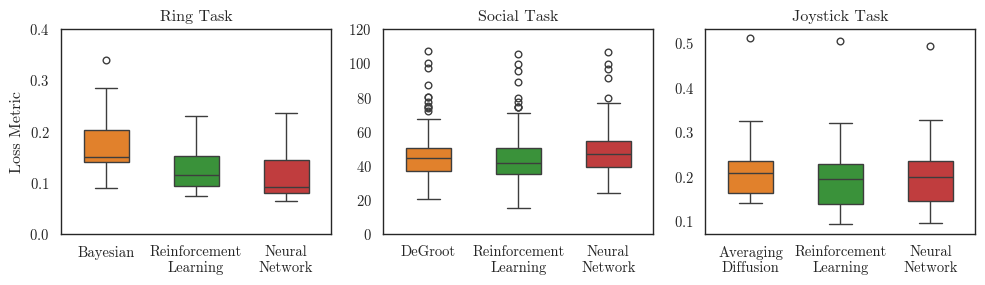

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
sns.boxplot(carrabin, x='type', y='loss', hue='type', ax=axes[0], palette=palette[1:4], notch=False, width=0.5) # , whis=(0, 100))
sns.boxplot(jiang, x='type', y='loss', hue='type', ax=axes[1], palette=palette[1:4], notch=False, width=0.5) # , whis=(0, 100))
sns.boxplot(yoo, x='type', y='loss', hue='type', ax=axes[2], palette=palette[1:4], notch=False, width=0.5) # , whis=(0, 100))
axes[0].set(xlabel=None, ylabel='Loss Metric', ylim=[0, 0.4], title="Ring Task") 
axes[1].set(xlabel=None, ylabel=None, ylim=[0, 120], title="Social Task") 
axes[2].set(xlabel=None, ylabel=None, title="Joystick Task") 
plt.tight_layout()
fig.savefig("plots/performance.jpg", dpi=600)